In [2]:
#!/usr/bin/env python3

import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

'''
Author: Enrico Ceccolini
    TODO write the description
'''

datadir = "/datasets/eurora_data/db_local/"
#infile_evaluation = datadir + "integration/evaluate_pow.csv"
#infile_evaluation = datadir + "integration/20141001-0000_20141010-0000/evaluate_pow.csv"
#data_real = pd.read_csv(infile_evaluation, index_col=0)

In [3]:
def plot_line(data_dates, data_real, data_approx, days_interval):
    plt.rcParams['figure.figsize'] = (20, 5)

    X_AXIS_NAME = 'Time'
    Y_AXIS_NAME = 'Power (Watt)'
    # TITLE = 'Nodes power consumption - Andrea\'s data'

    fig, ax = plt.subplots()
    #ax.xaxis.get_majorticklabels()
    #ax.xaxis.set_major_locator(mdates.DayLocator(interval=days_interval))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ##ax.xaxis.set_major_locator(mdates.HourLocator(interval=days_interval))
    ##ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    #ax.tick_params(axis='both', which='major', labelsize=15)
    
    dates = []
    colors = ("blue", "green")

    for ts in data_dates:
        local_d = datetime.strptime(ts, '%Y-%m-%d %H:%M:%S')
        dates.append(local_d)

    #print(len(dates))

    line1, = plt.plot(dates, data_real, c=colors[1], alpha=1, dashes=[3, 3], linewidth=1, label="Real Power")
    
    line2, = plt.plot(dates, data_approx, c=colors[0], alpha=0.9, linewidth=1, label="Estimated Mean Power")
    #plt.scatter(dates, node_data['pow_tot_0'] + node_data['pow_tot_1'])
    
    #plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
    #       ncol=2, mode="expand", borderaxespad=0.)
    # Create a legend for the first line.
    first_legend = plt.legend(handles=[line1, line2], loc=1)
    # Add the legend manually to the current Axes.
    ax = plt.gca().add_artist(first_legend)
    # Create another legend for the second line.
    #plt.legend(handles=[line2], loc=4)

    #fig.autofmt_xdate()
    plt.xlabel(X_AXIS_NAME, fontsize=15)
    plt.ylabel(Y_AXIS_NAME, fontsize=15)
    # plt.title(TITLE)
    


    # function to show the plot
    plt.show()
    #fig.savefig('graph.png', dpi=fig.dpi)

In [12]:
infile_evaluation = datadir + "integration/20140910-0000_20140912-2300/evaluate_powPCP3.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
#df['Total']-=1000
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_PCP3 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_PCP3))

21127.921783156293
6141.653855853719
3451.4801852898636
inizio 0    2014-09-10 00:00:00
Name: timestamp, dtype: object fine 56843    2014-09-13 06:56:55
Name: timestamp, dtype: object
56844


In [15]:
infile_evaluation = datadir + "integration/20140910-0000_20140912-2300/evaluate_pow15000.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_17000 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_17000))

17712.68240581206
6160.213234434222
3451.4801852898636
inizio 0    2014-09-10 00:00:00
Name: timestamp, dtype: object fine 56843    2014-09-13 06:56:55
Name: timestamp, dtype: object
56844


In [18]:
infile_evaluation = datadir + "integration/20140910-0000_20140912-2300/evaluate_pow10000.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_17000 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_17000))

12768.619498082096
6051.128252668625
3451.4801852898636
inizio 0    2014-09-10 00:00:00
Name: timestamp, dtype: object fine 56843    2014-09-13 06:56:55
Name: timestamp, dtype: object
56844


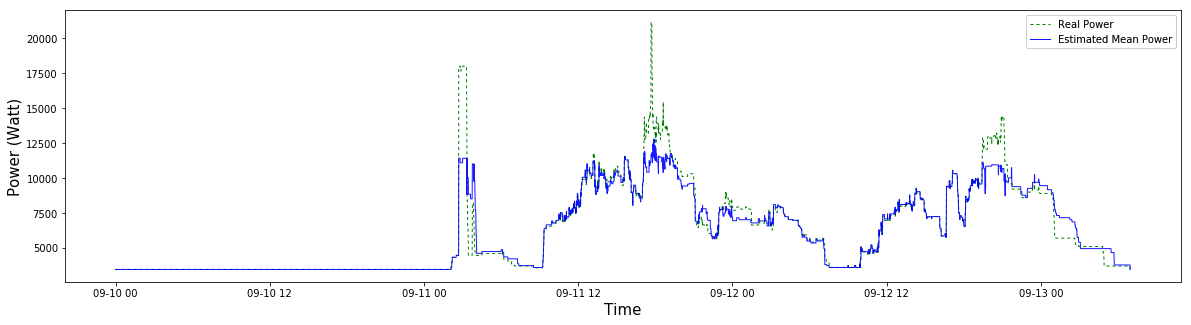

In [19]:
plot_line(data_dates=df['timestamp'], 
          data_real=df_total_PCP3, 
          data_approx=df_total_17000, days_interval=1)

In [20]:
infile_evaluation = datadir + "integration/20140910-0000_20140912-2300/evaluate_pow5000.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_17000 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_17000))

5839
2707.5499881973406
0
inizio 0    2014-09-10 00:00:00
Name: timestamp, dtype: object fine 63544    2014-09-13 16:15:20
Name: timestamp, dtype: object
63545


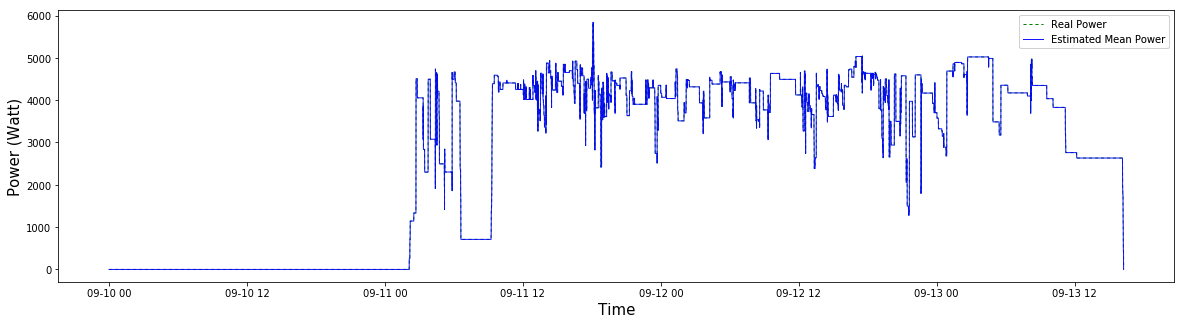

In [21]:
plot_line(data_dates=df['timestamp'], 
          data_real=df_total_17000, 
          data_approx=df_total_17000, days_interval=1)

In [20]:
infile_evaluation = datadir + "integration/20141001-0500_20141002-2200/evaluate_pow17000.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
df['Total']-=1000
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_17000 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_17000))

19030.395605670226
9092.413691164806
3451.4801852898636
inizio 0    2014-10-01 05:00:00
Name: timestamp, dtype: object fine 34775    2014-10-03 05:17:55
Name: timestamp, dtype: object
34776


In [67]:
infile_evaluation = datadir + "integration/20141001-0500_20141002-2200/evaluate_pow_realPCP3.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
df['Total']-=2000
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_PCP3 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_PCP3))

20111.027971083728
7703.830108842622
1373.8260107632404
inizio 0    2014-10-01 05:00:00
Name: timestamp, dtype: object fine 34775    2014-10-03 05:17:55
Name: timestamp, dtype: object
34776


In [68]:
infile_evaluation = datadir + "integration/20141001-0500_20141002-2200/evaluate_pow_real.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
df['Total']-=2000
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_17000 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_17000))

19337.231205831446
7706.318297382226
1373.8260107632404
inizio 0    2014-10-01 05:00:00
Name: timestamp, dtype: object fine 34775    2014-10-03 05:17:55
Name: timestamp, dtype: object
34776


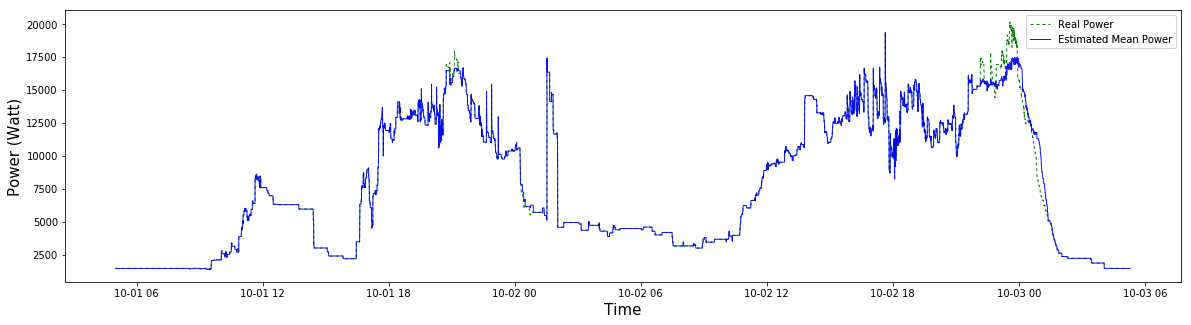

In [69]:
plot_line(data_dates=df['timestamp'], 
          data_real=df_total_PCP3, 
          data_approx=df_total_17000, days_interval=1)

In [73]:
# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_PCP3[df_total_PCP3>17000].shape[0]*5/60
minuti_totali = df_total_PCP3.shape[0]*5/60

print("{} ore su {} ore".format(minuti_sopra/60, minuti_totali/60))

# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_17000[df_total_17000>17000].shape[0]*5/60
minuti_totali = df_total_17000.shape[0]*5/60

print("{} ore su {} ore".format(minuti_sopra/60, minuti_totali/60))

0.9638888888888889 ore su 48.3 ore
0.38055555555555554 ore su 48.3 ore


In [74]:
0.38/0.96

0.39583333333333337

In [56]:
infile_evaluation = datadir + "integration/20140930-1400_20140930-1600/evaluate_pow_realPCP3.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_PCP3 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_PCP3))

7705.594994313355
4808.173577228097
3451.4801852898636
inizio 0    2014-09-30 14:00:00
Name: timestamp, dtype: object fine 5687    2014-09-30 21:53:55
Name: timestamp, dtype: object
5688


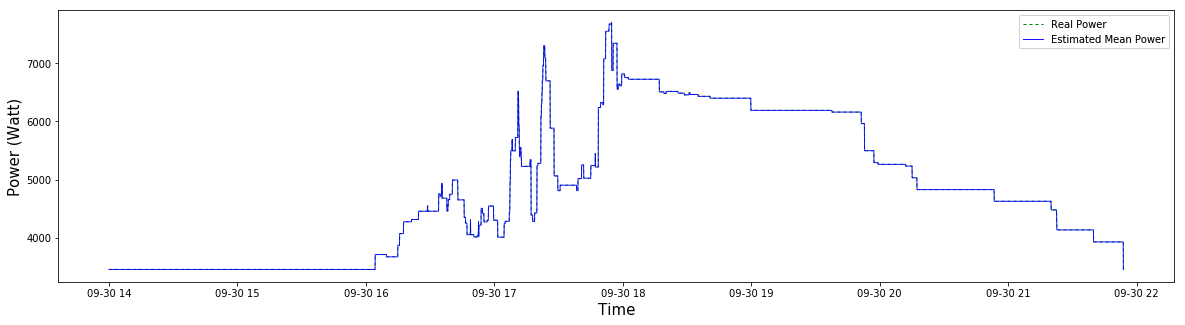

In [57]:
plot_line(data_dates=df['timestamp'], 
          data_real=df_total_PCP3, 
          data_approx=df_total_PCP3, days_interval=1)

In [58]:
infile_evaluation = datadir + "integration/20140930-1400_20140930-1600/evaluate_pow_real3500.csv"
data_real = pd.read_csv(infile_evaluation, index_col=0)
# clean node data if no jobs were executed on it
#min_consume = 60
df = data_real.drop('timestamp', axis=1)
#df = df.loc[:, (df.sum(axis=0) > min_consume*df.shape[0])]
df['timestamp'] = data_real['timestamp']
df['Total']= df.iloc[:, -63:-1].sum(axis=1)
print(df['Total'].max())
print(df['Total'].mean())
print(df['Total'].min())
df_total_17000 = df['Total']
print("inizio {} fine {}".format(df['timestamp'].head(1), df['timestamp'].tail(1)))
print(len(df_total_17000))

7135.046142155348
4433.999336661127
3451.4801852898636
inizio 0    2014-09-30 14:00:00
Name: timestamp, dtype: object fine 7865    2014-10-01 00:55:25
Name: timestamp, dtype: object
7866


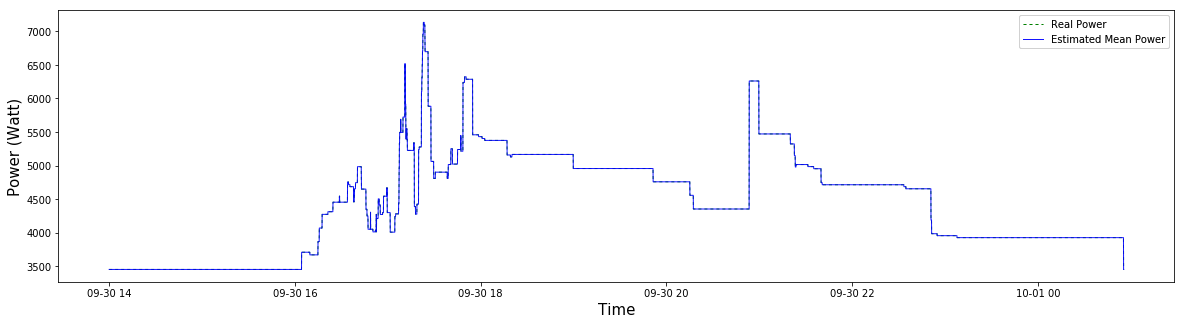

In [59]:
plot_line(data_dates=df['timestamp'], 
          data_real=df_total_17000, 
          data_approx=df_total_17000, days_interval=1)

In [65]:
# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_PCP3[df_total_PCP3 > 6000].shape[0]*5/60
minuti_totali = df_total_PCP3.shape[0]*5/60

print("{} ore su {} ore".format(minuti_sopra/60, minuti_totali/60))

# quanto tempo il limite viene superato in assenza di vicoli?

minuti_sopra = df_total_17000[df_total_17000 > 6000].shape[0]*5/60
minuti_totali = df_total_17000.shape[0]*5/60

print("{} ore su {} ore".format(minuti_sopra/60, minuti_totali/60))

2.1263888888888887 ore su 7.9 ore
0.2875 ore su 10.925 ore


In [66]:
0.28/2.12

0.1320754716981132

[Text(0, 0, '2014-10-01 08:00:00'),
 Text(0, 0, '2014-10-01 10:46:40'),
 Text(0, 0, '2014-10-01 13:33:20'),
 Text(0, 0, '2014-10-01 16:20:00'),
 Text(0, 0, '2014-10-01 19:06:40'),
 Text(0, 0, 'nan')]

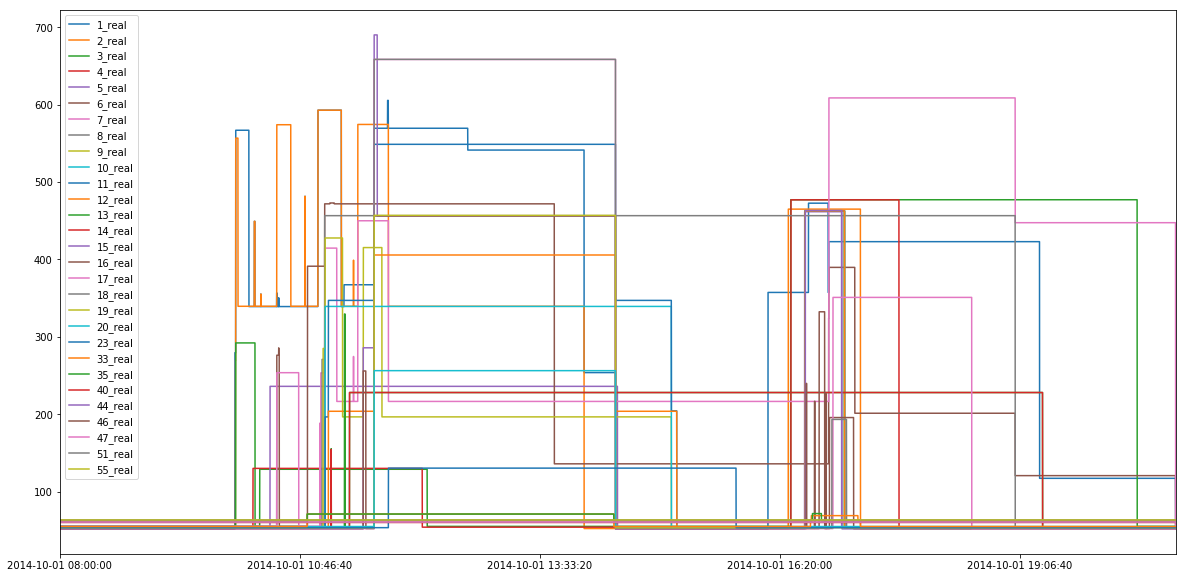

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
df.plot(ax=ax)
tick_idx = plt.xticks()[0]
year_labels = df.timestamp[tick_idx].values
ax.xaxis.set_ticklabels(year_labels)